# Numerov Method

In [ ]:
from IPython.display import Image

This method is used for *linear eigenvlaue problem*. The differential equation is, 
$$ \frac{d^2y}{dx^2} = q(\lambda, x) y(x) + r(x) $$
The Schrodinger equation is this kind of problem.

For this problem also, the specified boundary is $(x_0,y_0)$ and $(x_N,y_N)$ and some intermediate point is $(x_i,y_i)$ where $0<i<N$.

The Taylor series expansion at some point $x=x_i$ is,
$$ y(x_{i}+h) = y(x_{i})+hy^{\prime}(x_{i})+\frac{h^{2}}{2!}y^{\prime\prime}(x_{i})+\frac{h^{3}}{3!}y^{(3)}(x_{i})+\frac{h^{4}}{4!}y^{(4)}(x_{i})+\frac{h^{5}}{5!}y^{(5)}(x_{i})+O(h^{6}) $$
Here, this can be written as,
$$ y(x_{i+1}) = y(x_{i})+hy^{\prime}(x_{i})+\frac{h^{2}}{2!}y^{\prime\prime}(x_{i})+\frac{h^{3}}{3!}y^{(3)}(x_{i})+\frac{h^{4}}{4!}y^{(4)}(x_{i})+\frac{h^{5}}{5!}y^{(5)}(x_{i})+O(h^{6}) $$
and,
$$ y(x_{i-1}) = y(x_{i})-hy^{\prime}(x_{i})+\frac{h^{2}}{2!}y^{\prime\prime}(x_{i})-\frac{h^{3}}{3!}y^{(3)}(x_{i})+\frac{h^{4}}{4!}y^{(4)}(x_{i})-\frac{h^{5}}{5!}y^{(5)}(x_{i})+O(h^{6}) $$
By adding these 2 equations,
$$ y(x_{i+1})-2y(x_{i})+y(x_{i-1}) = h^{2}y_{i}^{\prime\prime} + 2\frac{h^{4}}{4!}y_{i}^{(4)}+O(h^{6}) $$
For the fourth order differentiation, we can do it by,
$$ y^{(4)}(x_{i}) = \frac{d^{2}}{dx^{2}}\left(\frac{d^{2}y}{dx^{2}}\right)_{x=x_{i}}=\frac{d^{2}}{dx^{2}}(q(\lambda,x)y(x)+r(x))_{x=x_{i}} $$

$$ \implies h^{2}y^{(4)}(x_{i}) = q(\lambda,x_{i+1})y(x_{i+1})-2q(\lambda,x_{i})y(x_{i})+ q(\lambda,x_{i-1})y(x_{i-1}) \\
+r(x_{i+1})-2r(x_{i})+r(x_{i-1})+O(h^{4}) $$
Replacing this in the previous equation,
$$ y(x_{i+1})-2y(x_i) + y(x_{i-1}) = h^2 \,[\,q(\lambda,x_i)y(x_i)+ r(x_i)] + \frac{h^2}{12} [q(\lambda, x_{i+1}) y(x_{i+1}) + r(x_{i+1}) \\
-2q(\lambda,x_{i})y(x_{i}) - 2r(x_i) +  q(\lambda,x_{i-1})y(x_{i-1}) + r(x_{i-1}) \,] + O(h^6) $$

$$ \implies y(x_{i+1})\left(1-\frac{h^{2}}{12}q(\lambda,x_{i+1})\right) - 2y(x_{i}) \left(1+\frac{5h^{2}}{12}q(\lambda,x_{i+1})\right) + y(x_{i-1}) \left(1-\frac{h^{2}}{12}q(\lambda,x_{i-1})\right) \\
= \frac{h^{2}}{12} \left(r(x_{i+1}) + 10r(x_i) + r(x_{i-1})\right) + O(h^6) $$

The reduced equation is (using the transformation $i\rightarrow i-1$) is,
$$ y(x_i) = \frac{a}{d} y(x_{i-1}) + \frac{b}{d} y(x_{i-2}) + \frac{c}{d} $$
where,
$$ a = 2\left(1 + \frac{5h^2}{12}q(\lambda, x_{i-1})\right) $$
$$ b = -\left(1 - \frac{h^2}{12}q(\lambda, x_{i-2})\right) $$
$$ c = \frac{h^2}{12}\left(r(x_i) + 10 \, r(x_{i-1}) + r(x_{i-2})\right) $$
$$ d = 1 - \frac{h^2}{12}q(\lambda, x_i) $$

## Numerical solution by Numerov Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Propagator with Numerov Method
Function: **`propNumerov`**

This function takes an eigenvalue as an input and returns the corresponding eigenfunction.

**Algorithm:**

1. Define functions $p(x)$ and $q(\lambda, x)$.
2. h = x[1] - x[0].
3. xi = x0 + ih for i in range(N).
4. Write relations for $a,b,c,d$ and $y_i$ for i in range(2,N).

In [2]:
def propNumerov(pr, q, r, x, y, dx):
    '''
    q = q(lambda, x), r = r(x)
    x - x array of propagation
    y - y array of propagation (a zero list generally)
    dx - increment along x axis
    yy - returned y array
    '''
    N = len(x)
    yy = [y[i] for i in range(N)]
    for i in range(2, N):
        a = 2*(1 + 5*dx**2/12 * q(pr, x[i-1]))
        b = -(1 - dx**2/12 * q(pr, x[i-2]))
        c = dx**2/12 * (r(x[0]) + 10*r(x[i-1]) + r(x[i-2]))
        d = 1 - dx**2/12 * q(pr, x[i])
        yy[i] = a/d * yy[i-1] + b/d * yy[i-2] + c/d
    return yy

### Solving the eigenvalue problem
Function: **`NumerovEigVal`**

Here, the steps mentioned in the **"Eigenvalue Problems"** section are applied.

In [3]:
def NumerovEigVal(prMin, prMax, q, r, x0, y0, xN, yN, y1, dx, nodes, tol, mxItr):
    '''
    prMin, prMax - lower and upper limit of eigenvalue
    q = q(lambda, x), r = r(x)
    x0, y0 - left boundary conditions
    xN, yN - right boundary conditions
    y1 - next y value after y0
    dx - increment along x axis
    nodes - no. of nodes of eigenvalue
    tol - tolerance
    mxItr - maximum allowed iteration
    Return: pr, x, yy
        pr - eigenvalue
        x - x array of solution
        yy = y array of solution
    '''
    N = int((xN-x0)/dx)
    dx = (xN - x0)/N
    x = [x0 + i*dx for i in range(N+1)]
    y = [0 for i in range(N+1)]  # zero list
    y[0], y[1], y[N] = y0, y1, yN
    itr = 0
    # tol = 1e-6  # tolerance

    while abs(prMax-prMin) > tol and itr < mxItr:
        pr = 0.5*(prMin + prMax) # proceeding to bisection method
        yy = propNumerov(pr, q, r, x, y, dx)
        cnt = 0
        for i in range(1, N-2):
            if yy[i]*yy[i+1]<0:
                cnt += 1
        if cnt > nodes:
            prMax = pr
        elif cnt < nodes:
            prMin = pr
        else:
            if yy[N-1] > yN:
                prMin = pr
            elif yy[N-1] < yN:
                prMax = pr
        itr += 1
    if itr < mxItr:
        return pr, x, yy
    else:
        return None, None, None

### Normalization
Function: **`psiNorm(psi, dx)`**

In [4]:
def psiNorm(psi, dx):
    N = len(psi)
    psi2 = [psi[i]**2 for i in range(N)]
    psi2arr = np.array(psi2)
    psimod2 = np.sum(psi2arr*dx)
    norm_psi = np.array(psi)/(psimod2)**0.5
    return norm_psi

In [5]:
print(f'propNumerov: {propNumerov.__doc__}')
print(f'\nNumerovEigVal: {NumerovEigVal.__doc__}')

propNumerov: 
    q = q(lambda, x), r = r(x)
    x - x array of propagation
    y - y array of propagation (a zero list generally)
    dx - increment along x axis
    yy - returned y array
    

NumerovEigVal: 
    prMin, prMax - lower and upper limit of eigenvalue
    q = q(lambda, x), r = r(x)
    x0, y0 - left boundary conditions
    xN, yN - right boundary conditions
    y1 - next y value after y0
    dx - increment along x axis
    nodes - no. of nodes of eigenvalue
    tol - tolerance
    mxItr - maximum allowed iteration
    Return: pr, x, yy
        pr - eigenvalue
        x - x array of solution
        yy = y array of solution
    


## Example (Numerov method)
Plot solution of the eigenvalue equation,
$$ \frac{d^2y}{dx^2} = -\lambda y(x) $$ 
with boundary conditions,
$\quad y(0) = 0 \quad$ and $\quad y(2\pi) = 0$.

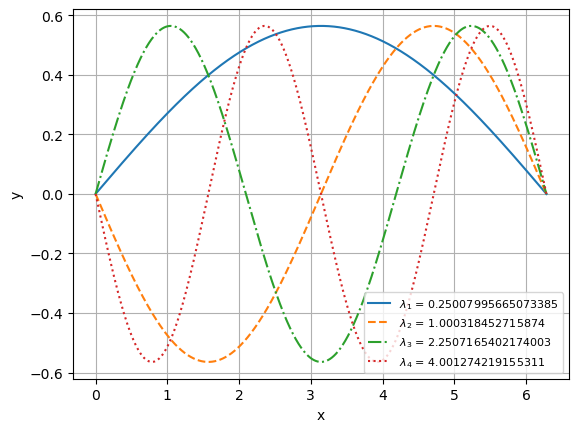

In [6]:
def q(lam, x):
    return -lam
def r(x):
    return 0

dx = 0.001
tol = 1e-6
mxitr = 100
lmin, lmax = 0.1, 30
x0, y0, xN, yN = 0, 0, 2*np.pi, 0

sty = ['-', '--', '-.', ':']
for nodes in range(4):
    y1 = (-1)**nodes*1e-4
    lam, x, y = NumerovEigVal(lmin, lmax, q, r, x0, y0, xN, yN, y1, dx, nodes, tol, mxitr)
    y = psiNorm(y, dx)
    plt.plot(x, y, sty[nodes], label=f'$\lambda_{nodes+1}$ = {lam}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='best', prop={'size':8})
plt.grid()
plt.show()

## Solution of Schrodinger equation by Numerov method
The time independent Schrodinger equation in 1D is,
$$ -\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi(x) = E\psi(x) $$

For central potential $V=V(r)$, the time independent (1D) Schrodinger will be reduced to,
$$ \frac{d^2\psi}{dr^2} = \frac{2m}{\hbar^2} \, (V(r)-E) \,\psi(r) $$

Now, comparing the above equation with our general differential equation,
$$ \frac{d^2y}{dx^2} = q(\lambda, x) y(x) + r(x) $$
we can notice,
$$ y(x) = \psi(r) $$
$$ q(\lambda, x) = -\frac{2m}{\hbar^2} (E-V(r)) $$
$$ r(x) = 0 $$

### Infinite potential well

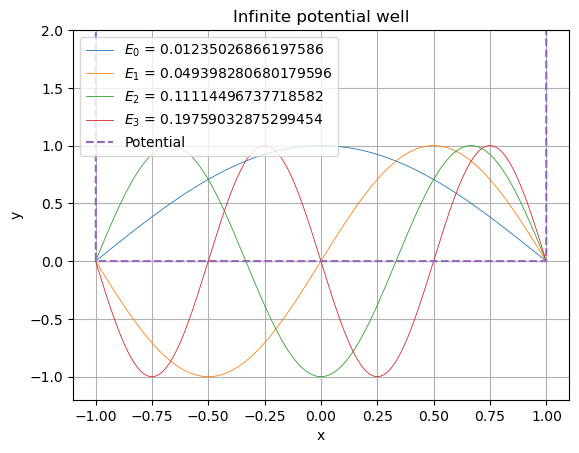

In [7]:
hcut, m = 0.1, 1
mh2 = 2*m/hcut**2
def V(x):
    l0, l1, V0 = -1, 1, 500
    if l0<x and x<l1:
        pot = 0
    else:
        pot = V0
    return pot

def q(E, x):
    return -mh2*(E-V(x))
def r(x):
    return 0

dx = 0.001
tol = 1e-6
mxitr = 100
x0, xN = -1, 1
y0, yN = 0, 0
Emin, Emax = V(0), V(x0)

for nodesn in range(4):
    y1 = (-1)**nodesn*1e-4
    E, x, y = NumerovEigVal(Emin, Emax, q, r, x0, y0, xN, yN, 
                            y1, dx, nodesn, tol, mxitr)
    y = psiNorm(y, dx)
    plt.plot(x, y, label=f'$E_{nodesn}$ = {E}', lw=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1.2,2)
Vx = [V(i) for i in x]
plt.plot(x, Vx, '--', label='Potential')
plt.legend(loc='best')
plt.title('Infinite potential well')
plt.grid()
plt.show()

### Linear Harmonic Oscillator
The potential (1D) is,
$$ V(x) = \frac{1}{2}kx^2 $$

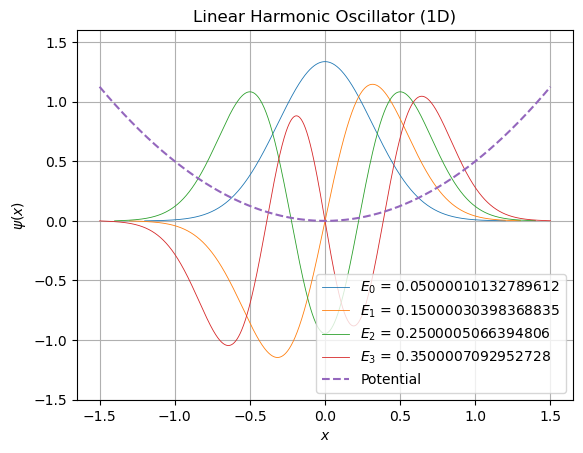

In [8]:
hcut, m = 0.1, 1
mh2 = 2*m/hcut**2
def V(x):
    k = 1
    return (1/2)*k*x**2

def q(E, x):
    return -mh2*(E-V(x))
def r(x):
    return 0

dx = 0.001
tol = 1e-6
mxitr = 100
bnd = np.array([1.2, 1.3, 1.4, 1.5, 1.6, 1.7])
x0, xN = -bnd, bnd
y0, yN = 0, 0
Emin, Emax = 0, V(20)

for nodesn in range(4):
    y1 = (-1)**nodesn*1e-4
    E, x, y = NumerovEigVal(Emin, Emax, q, r, x0[nodesn], y0, xN[nodesn], yN, 
                            y1, dx, nodesn, tol, mxitr)
    y = psiNorm(y, dx)
    plt.plot(x, y, label=f'$E_{nodesn}$ = {E}', lw=0.6)
plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.ylim(-1.5,1.6)
Vx = [V(i) for i in x]
plt.plot(x, Vx, '--', label='Potential')
plt.legend(loc='best')
plt.title('Linear Harmonic Oscillator (1D)')
plt.grid()
plt.show()

### Harmonic Oscillator with perturbation
Let the potential be,
$$ V(r) = \frac{1}{2}kr^2 + \frac{1}{3} br^3 $$
(This potential is actually originated from the interaction force, $F(r)=-kr-br^2$.)

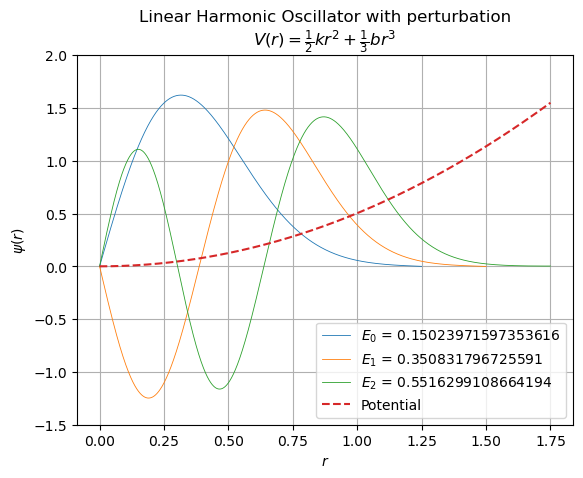

In [9]:
hcut, m = 0.1, 1
mh2 = 2*m/hcut**2
def V(r):
    k, b = 1, 0.01
    return (1/2)*k*r**2 +(1/3)*b*r**3

def q(E, r):
    return -mh2*(E-V(r))
def rfn(r):
    return 0

dr = 0.001
tol = 1e-6
mxitr = 100
bnd = np.array([1.25, 1.5, 1.75, 2, 2.25, 2.5])
r0, rN = 0, bnd
y0, yN = 0, 0
Emin, Emax = 0, V(20)

for nodesn in range(3):
    y1 = (-1)**nodesn*1e-4
    E, r, y = NumerovEigVal(Emin, Emax, q, rfn, r0, y0, rN[nodesn], yN, 
                            y1, dr, nodesn, tol, mxitr)
    y = psiNorm(y, dr)
    plt.plot(r, y, label=f'$E_{nodesn}$ = {E}', lw=0.6)
plt.xlabel('$r$')
plt.ylabel('$\psi(r)$')
plt.ylim(-1.5,2)
Vr = [V(i) for i in r]
plt.plot(r, Vr, '--', label='Potential')
plt.legend(loc='best')
plt.title('Linear Harmonic Oscillator with perturbation\n'+
          '$ V(r) = \\frac{1}{2}kr^2 + \\frac{1}{3} br^3 $')
plt.grid()
plt.show()